In [19]:
import pandas as pd

data = pd.read_excel('data_set.xlsx')
del data["Unnamed: 0"]
data.head()

,ADDRESS,CITY,REGION,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,"г.Калуга, Литейная ул., 25/15",КАЛУГА,Калужская область,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,0,NaN,остановка,423321
1,"г.Калуга, Гагарина ул., 1",КАЛУГА,Калужская область,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,1,NaN,остановка,423321
2,"г.Калуга, Кибальчича ул., 25",КАЛУГА,Калужская область,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,0,NaN,NaN,423321
3,"г.Калуга, Пестеля ул., 60/49",КАЛУГА,Калужская область,3.0,2.2,0.0,12.0,1.0,7162.0,10099,3257,324698,0,0,NaN,NaN,423321
4,"г.Калуга, Ленина ул., 81",КАЛУГА,Калужская область,1.0,2.0,0.0,9.0,1.0,6269.0,10096,3195,324698,1,0,NaN,остановка,423321


In [20]:
def replace_binary_value(b):
    if b and pd.notnull(b):
        return 1
    else:
        return -1

data.iloc[:, 12:16] = data.iloc[:, 12:16].agg(lambda row: row.agg(replace_binary_value, axis=0), axis=1)

data_kal_obl = data[data['REGION'] == 'Калужская область']
data_tul_obl = data[data['REGION'] == 'Тульская область']

Построим графики попарных распределений признаков и целевых переменных:

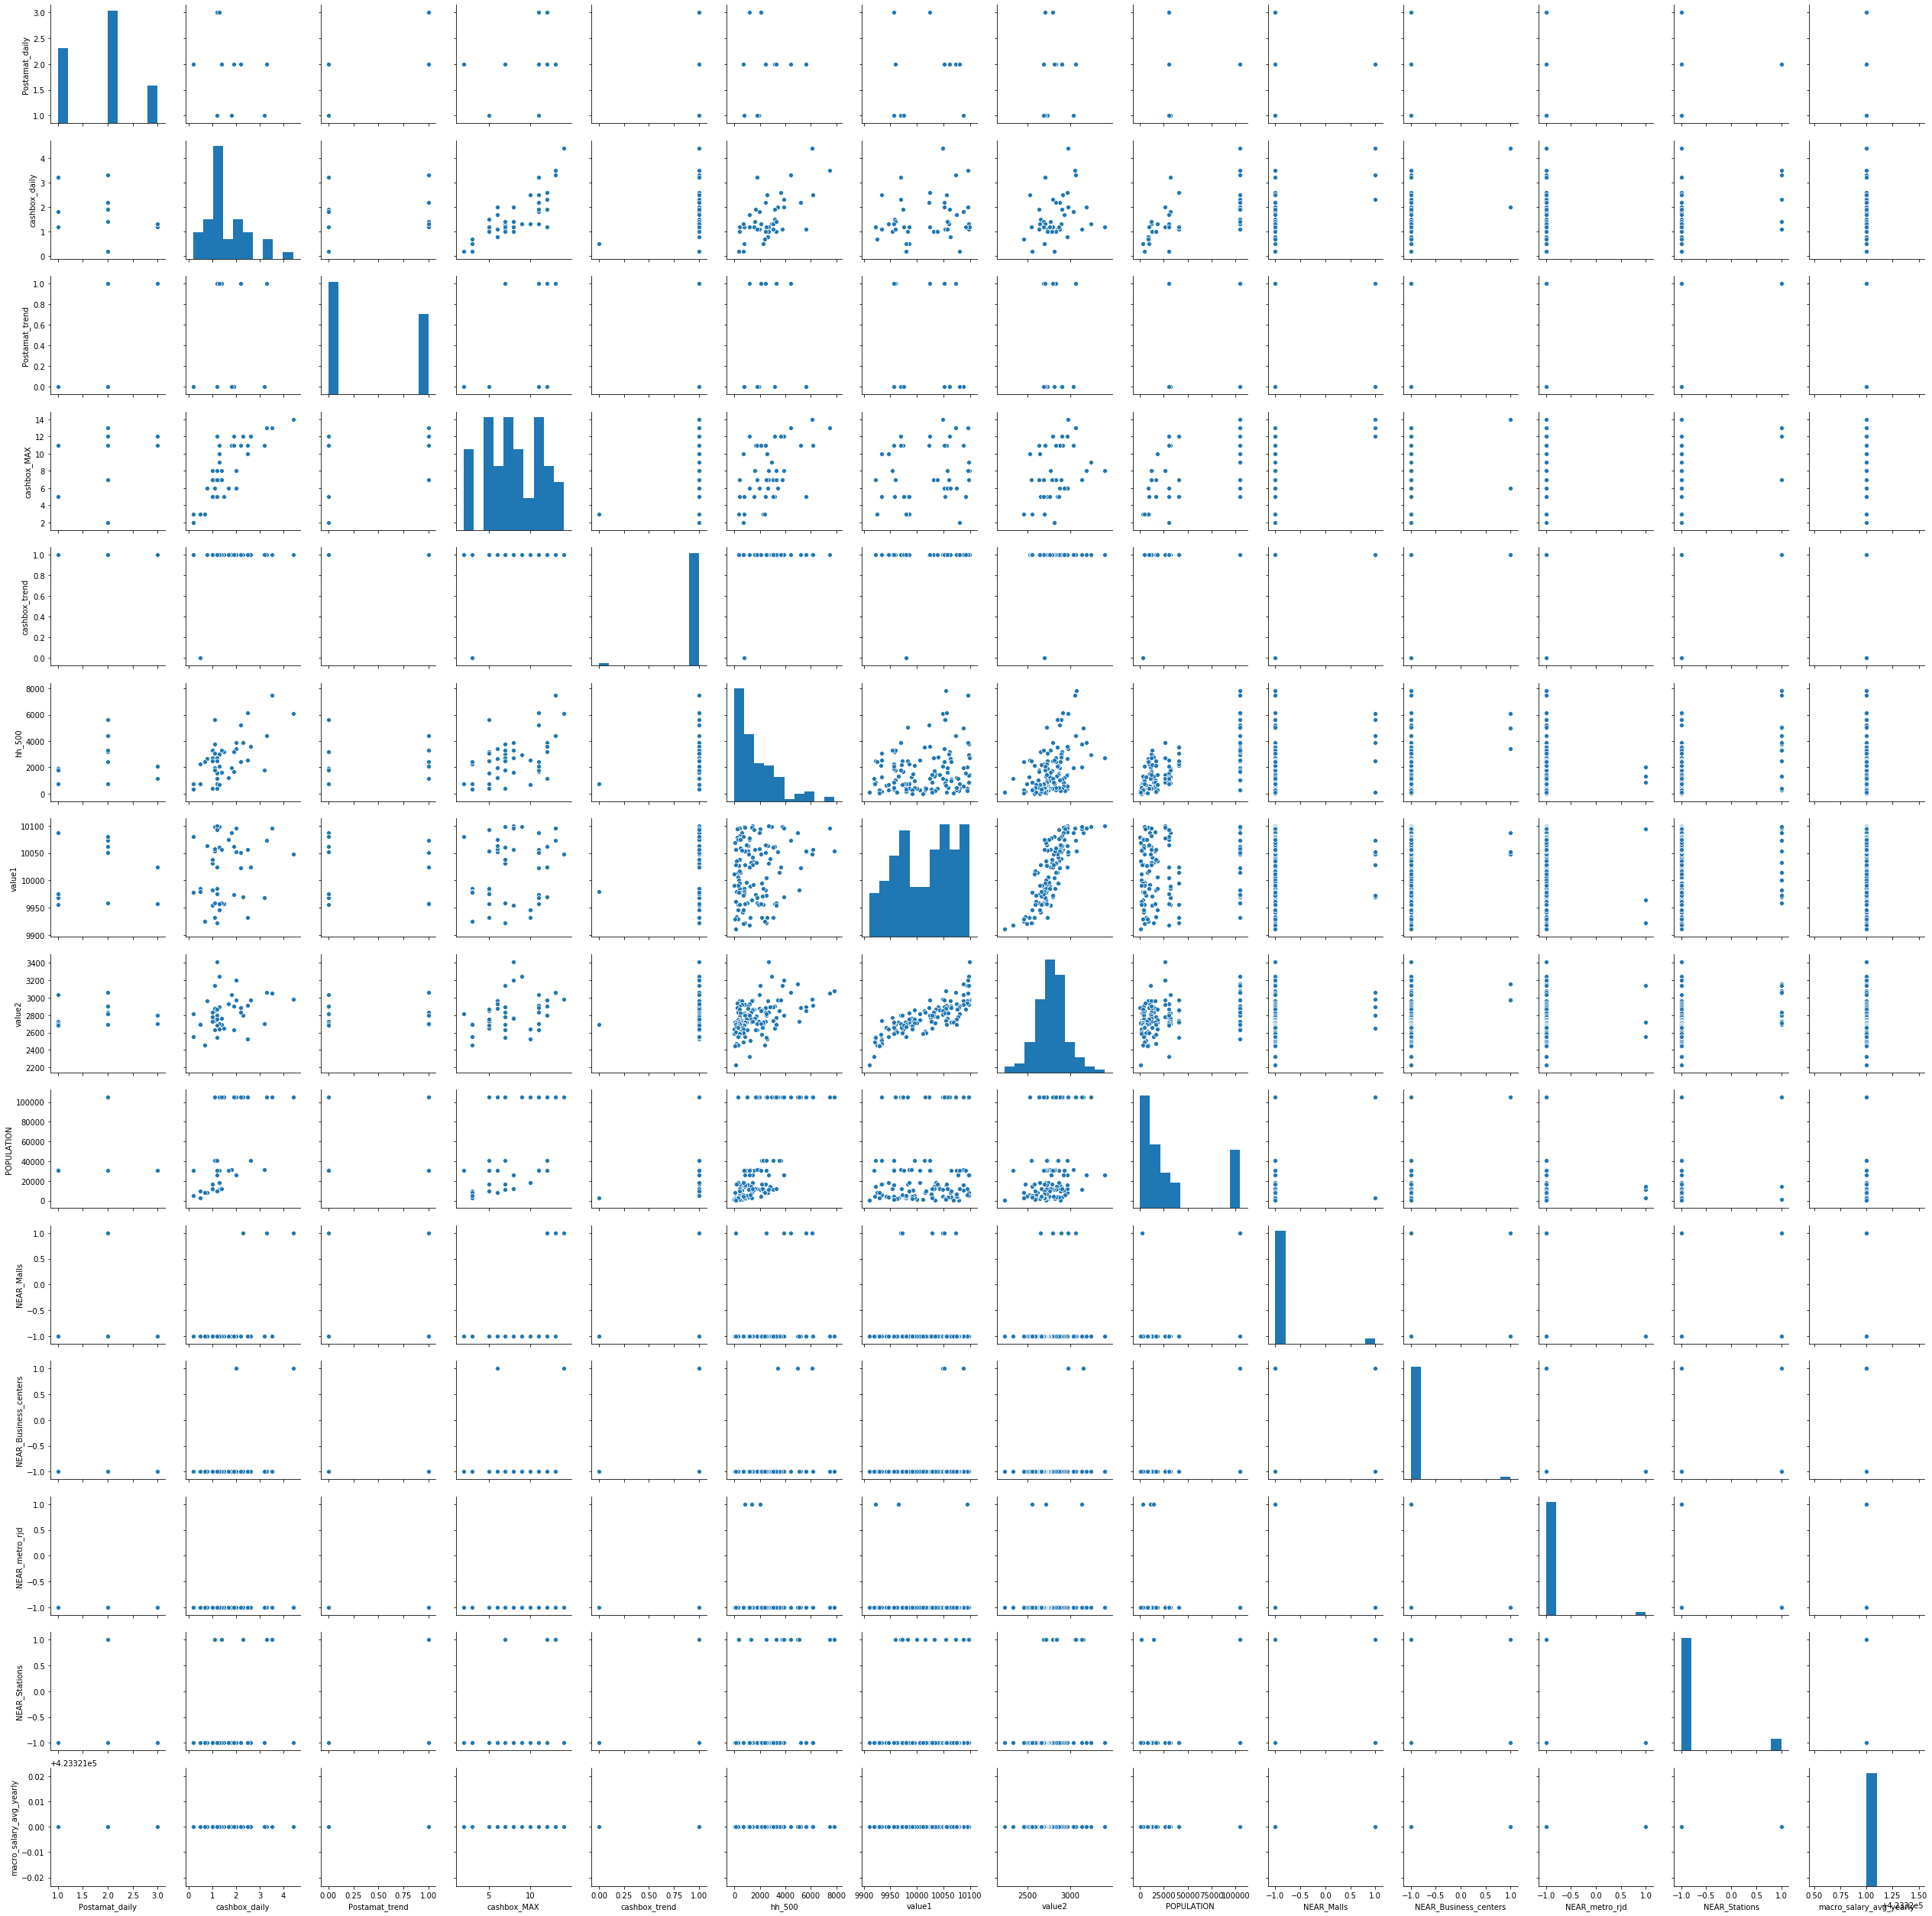

In [15]:
import seaborn as sns

sns.pairplot(data_kal_obl.iloc[:, 3:17])

Видно, что города с большим населением (областные центры, т.е. Калуга и Тула) выбиваются из общего распределения, следовательно их надо рассматирвать отдельно

In [21]:
data_kaluga = data_kal_obl[data_kal_obl['CITY'] == 'КАЛУГА']
data_tula = data_tul_obl[data_tul_obl['CITY'] == 'ТУЛА']
data_kal_obl = data_kal_obl[data_kal_obl['CITY'] != 'КАЛУГА']
data_tul_obl = data_tul_obl[data_tul_obl['CITY'] != 'ТУЛА']

Найдем сначала зависимость среднего количества посылок, выданных в постамате

In [22]:
X = data_kaluga[data_kaluga['Postamat_daily'].notnull()].iloc[:, 6:18]

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 3 to 193
Data columns (total 11 columns):
cashbox_MAX                21 non-null float64
cashbox_trend              19 non-null float64
hh_500                     22 non-null float64
value1                     22 non-null int64
value2                     22 non-null int64
POPULATION                 22 non-null int64
NEAR_Malls                 22 non-null int64
NEAR_Business_centers      22 non-null int64
NEAR_metro_rjd             22 non-null int64
NEAR_Stations              22 non-null int64
macro_salary_avg_yearly    22 non-null int64
dtypes: float64(3), int64(8)
memory usage: 2.1 KB


In [24]:
X.describe()

,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
count,21.000000,19.0,22.000000,22.000000,22.000000,22.0,22.000000,22.0,22.000000,22.000000,22.0
mean,7.476190,1.0,3559.590909,10043.909091,2990.545455,324698.0,-0.636364,-1.0,-0.909091,-0.181818,423321.0
std,2.976895,0.0,1832.463776,57.652414,216.606232,0.0,0.789542,0.0,0.426401,1.006473,0.0
min,2.000000,1.0,859.000000,9933.000000,2680.000000,324698.0,-1.000000,-1.0,-1.000000,-1.000000,423321.0
25%,6.000000,1.0,2136.250000,9998.250000,2809.000000,324698.0,-1.000000,-1.0,-1.000000,-1.000000,423321.0
50%,8.000000,1.0,3099.000000,10062.500000,2961.000000,324698.0,-1.000000,-1.0,-1.000000,-1.000000,423321.0
75%,9.000000,1.0,5101.250000,10095.750000,3191.250000,324698.0,-1.000000,-1.0,-1.000000,1.000000,423321.0
max,13.000000,1.0,7162.000000,10100.000000,3403.000000,324698.0,1.000000,-1.0,1.000000,1.000000,423321.0


Обработаем признаки и целевые переменные:

In [25]:
del X["POPULATION"]
del X["macro_salary_avg_yearly"]
del X["NEAR_Business_centers"]
del X["cashbox_trend"]

Мы удалили эти столюцы, так как в них везде одинаковые значения

In [26]:
import numpy as np

X.fillna(0, inplace=True)
X = (X - X.mean()) / X.std()

In [28]:
y = data_kaluga[data_kaluga['Postamat_daily'].notnull()].Postamat_daily
y = (y - y.mean()) / y.std()

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

lasso = Lasso(0.05)
ridge = Ridge()
lin_reg = LinearRegression()

Проверим, что модель Лассо адекватно приближает значения:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lasso.fit(X_train, y_train)
print(mse(y_test, lasso.predict(X_test)), mae(y_test, lasso.predict(X_test)))

0.6718475463795847 0.557472661381456


Применим модель Лассо для отбора значащих признаков:

In [31]:
lasso.fit(X, y)
lasso.coef_

array([ 0.243412  , -0.13553793,  0.42948169,  0.07173479, -0.13630835,
       -0.        , -0.05025171])

In [32]:
X.corr()

,cashbox_MAX,hh_500,value1,value2,NEAR_Malls,NEAR_metro_rjd,NEAR_Stations
cashbox_MAX,1.000000,0.313216,0.607264,0.601295,0.234958,-0.211401,-0.263494
hh_500,0.313216,1.000000,0.559093,0.618832,-0.029646,-0.174614,-0.310622
value1,0.607264,0.559093,1.000000,0.917634,0.065621,-0.418054,-0.402420
value2,0.601295,0.618832,0.917634,1.000000,-0.004556,-0.320218,-0.411478
NEAR_Malls,0.234958,-0.029646,0.065621,-0.004556,1.000000,-0.102869,0.087163
NEAR_metro_rjd,-0.211401,-0.174614,-0.418054,-0.320218,-0.102869,1.000000,0.262265
NEAR_Stations,-0.263494,-0.310622,-0.402420,-0.411478,0.087163,0.262265,1.000000


Признаки value1 и value2 получили ненулевые веса, однако у них большая корреляция, поэтому один из них не надо учитывать. Посчитаем веса у всех признаков с отсутствующими value2 и value1:

In [33]:
lasso.fit(X.drop(labels='value1', axis=1), y)
lasso.coef_

array([ 0.27140375, -0.13821441,  0.43930472, -0.1142839 , -0.02111813,
       -0.06167358])

In [34]:
lasso.fit(X.drop(labels='value2', axis=1), y)
lasso.coef_

array([ 0.25043439, -0.12489243,  0.48472109, -0.14144825, -0.        ,
       -0.05193447])

При отсутвуещем value1 вес признака NEAR_metro_rjd перестает быть нулевым, то есть имеется какая-то неявная зависимоть между ними, но нет зависимотсти между NEAR_metro_rjd и value2. Поэтому следует оставить value2.

In [35]:
X.drop(labels=['value1'], axis=1, inplace=True)

In [36]:
X.head()

,cashbox_MAX,hh_500,value2,NEAR_Malls,NEAR_metro_rjd,NEAR_Stations
3,1.467742,1.965883,1.230133,-0.460566,-0.213201,-0.812920
4,0.562406,1.478561,0.943900,2.072548,-0.213201,1.174218
7,0.562406,1.130941,1.904167,-0.460566,-0.213201,-0.812920
11,-0.041152,0.871182,1.096250,-0.460566,-0.213201,-0.812920
15,1.165963,0.912656,1.327083,-0.460566,-0.213201,-0.812920


In [46]:
def test_regressor(X, y, regressor):
    mean_mse = 0
    mean_mae = 0
    
    for i in range(1000):
        X_train , X_test, y_train, y_test = train_test_split(X, y)
        regressor.fit(X_train, y_train)
        mean_mse += mse(y_test, regressor.predict(X_test))
        mean_mae += mae(y_test, regressor.predict(X_test))
        
    print('MSE = ', mean_mse/1000)
    print('MAE = ', mean_mae/1000)

Выявим лучшую модель линейной регрессии:

In [47]:
print('LinReg:')
test_regressor(X, y, lin_reg)

print('Lasso:')
test_regressor(X, y, lasso)

print('Ridge:')
test_regressor(X, y, ridge)

LinReg:
MSE =  1.205149588088273
MAE =  0.8705384694785888
Lasso:
MSE =  1.0212850557137805
MAE =  0.808173416592871
Ridge:
MSE =  1.0346606793902202
MAE =  0.8127670286539496


Большого различия в точности между ними нет, однако чуть точнее все-таки Lasso. Далее изучим точности некоторых других регрессионых моделей:

In [48]:
from sklearn.tree import DecisionTreeRegressor

des_tree = DecisionTreeRegressor()

print('DesTree:')
test_regressor(X, y, des_tree)

DesTree:
MSE =  1.2694354838709665
MAE =  0.819539275236954


In [49]:
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor()

print('ExtraTree:')
test_regressor(X, y, extra_tree)

ExtraTree:
MSE =  1.408266129032259
MAE =  0.8896986464256375


In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

print('KNN:')
test_regressor(X, y, knn)

KNN:
MSE =  0.8966206451612901
MAE =  0.7941505807756071


Видно, что модель KNN оказалась наилучшей. На остальных датасетах применим ту же стратегию (в силу идентичности данных, различий не будет)